In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from altair import Chart, X, Y, Axis, Scale, Color, Legend

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("../data/double_hybrid_bucket_basic_circuits.csv")

In [3]:
df.columns

Index(['mode', 'distill_reqd', 'distill_distances', 'distill_factories',
       'distill_sim_states', 'distill_cycles_per_state',
       'distill_total_cycles', 'distill_logical_q_per_factory',
       'distill_logical_q', 'distill_phys_q', 'distill_time',
       'clifford_distance', 'clifford_phys_q', 'clifford_time',
       'clifford_total_avg_cycles', 'total_time', 'total_cost',
       'safety_factor', 'eps', 'total_phys_q', 'n_qubits', 't_count',
       't_depth', 'h_count', 'cnot_count', 'cliffords', 'depth', 'name', 'n',
       'q', 'k', 'b1', 'b2', 'p_in', 'p_g', 't_sc'],
      dtype='object')

In [4]:
np.unique(df['n'])

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36])

In [5]:
df[np.logical_and(df['name'] == 'LargeWidthSmallDepth', df['n'] == 36)]['distill_distances']

216712     [9, 4]
218386     [9, 4]
220136     [9, 4]
222058     [9, 5]
224060    [10, 5]
226246    [10, 5]
228516    [10, 5]
230982    [10, 5]
233536    [10, 5]
236206    [11, 5]
Name: distill_distances, dtype: object

In [7]:
df[np.logical_and(df['n'] == 36, df['k'] == 0)][['n', 'q','name','total_time','total_phys_q']]

,n,q,name,total_time,total_phys_q
216710,36,0,BucketBrigade,4.810363e+06,5.208936e+13
216711,36,0,BucketBrigadeParallel,2.130000e-03,3.758471e+14
216712,36,26,LargeWidthSmallDepth,3.536000e-03,2.732168e+12
216713,36,26,SmallWidthLargeDepth,1.797175e+05,4.653600e+04
218386,36,27,LargeWidthSmallDepth,3.536000e-03,5.464335e+12
218387,36,27,SmallWidthLargeDepth,3.594351e+05,4.653600e+04
220136,36,28,LargeWidthSmallDepth,3.536000e-03,1.092867e+13
220137,36,28,SmallWidthLargeDepth,7.188702e+05,4.653600e+04
222058,36,29,LargeWidthSmallDepth,3.808000e-03,2.235928e+13
222059,36,29,SmallWidthLargeDepth,1.548336e+06,4.624800e+04


In [8]:
df[np.logical_and(df['n'] == 15, df['k'] == 0)][['n', 'q','name','total_time','total_phys_q']]

,n,q,name,total_time,total_phys_q
0,15,0,BucketBrigade,1.179600,5191580.0
1,15,0,BucketBrigadeParallel,0.000348,72522496.0
2,15,5,LargeWidthSmallDepth,0.000006,27869.0
3,15,5,SmallWidthLargeDepth,0.000171,870.0
36,15,6,LargeWidthSmallDepth,0.000416,253650.0
37,15,6,SmallWidthLargeDepth,0.020480,4700.0
110,15,7,LargeWidthSmallDepth,0.000416,507250.0
111,15,7,SmallWidthLargeDepth,0.040960,4700.0
220,15,8,LargeWidthSmallDepth,0.000520,1380082.0
221,15,8,SmallWidthLargeDepth,0.102400,6556.0


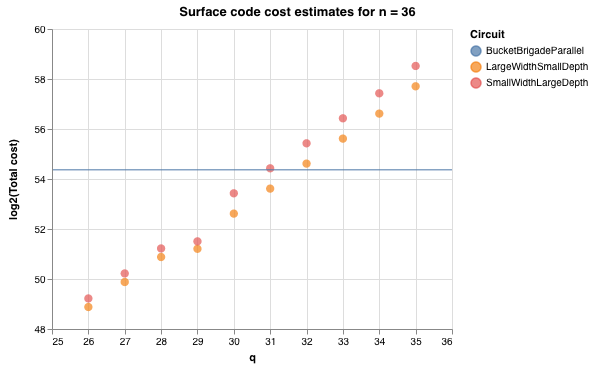

In [13]:
# Space vs. time tradeoff
ldw = df[np.logical_or(df['name'] == 'LargeWidthSmallDepth', df['name'] == 'SmallWidthLargeDepth')]
ldw = ldw[ldw['n'] == 36]

bb = df[df['name'] == 'BucketBrigadeParallel']
bb = bb[bb['n'] == 36]

title = "Surface code cost estimates for n = 36"

points = Chart(ldw, title=title).mark_circle(size=70).encode(
                              x=X('q',
                                  scale=Scale(domain=[25,36]),
                                  axis=Axis(title="q")),
                              y=Y('total_cost',
                                  scale=Scale(domain=[48,60]),
                                  axis=Axis(title="log2(Total cost)")),
                              color=Color('name', legend=Legend(title="Circuit")))

rules = Chart(bb).mark_rule().encode(y='total_cost', 
                              shape='name', color=Color('name', legend=Legend(title="Circuit")))

points + rules


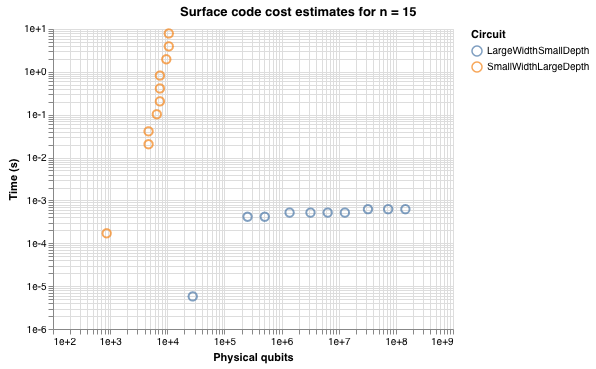

In [10]:
# Space vs. time tradeoff for baby 4KB qRAM
ldw = df[np.logical_or(df['name'] == 'LargeWidthSmallDepth', df['name'] == 'SmallWidthLargeDepth')]
ldw = ldw[ldw['n'] == 15]

title = "Surface code cost estimates for n = 15"

points = Chart(ldw, title=title).mark_point(size=70).encode(
                              x=X('total_phys_q',
                                  scale=Scale(type='log'),
                                  axis=Axis(title="Physical qubits",format="e")),
                              y=Y('total_time',
                                  scale=Scale(type='log'),
                                  axis=Axis(title="Time (s)",format="e")),
                              color=Color('name', legend=Legend(title="Circuit")))

#rules = Chart(bb).mark_rule().encode(y='total_cost', 
#                              shape='name', color=Color('name', legend=Legend(title="Circuit")))

points

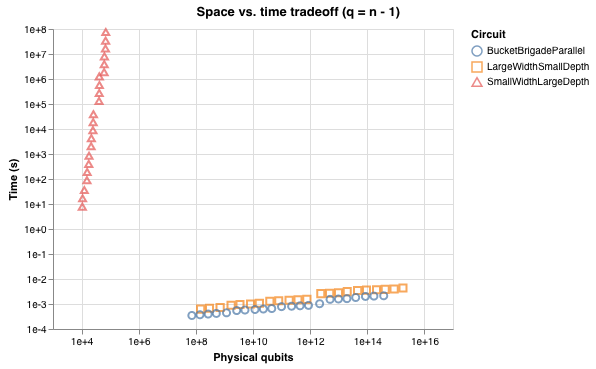

In [11]:
# Space vs. time tradeoff for 8 GB qRAM
bb = df[[df['name'][i][0:6] != "Double" and df['name'][i][0:6] != "Hybrid" for i in range(df.shape[0])]]
bb = bb[np.logical_or(bb['name'] == 'BucketBrigadeParallel', bb['q'] == bb['n'] - 1)]
#bb = df[np.logical_or(df['name'] == "BucketBrigade", np.logical_or(df['name'] == "BucketBrigadeParallel", df['q'] == df['n'] - 1))]

Chart(bb, name="space_v_time_basic_bucket", title="Space vs. time tradeoff (q = n - 1)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log', domain=[1e3,1e17]),
                                  axis=Axis(title="Physical qubits", 
                                            format="e", tickCount= 6)),
                              y=Y('total_time',
                                  scale=Scale(type='log'),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )